<a href="https://colab.research.google.com/github/Hannicko/subject101/blob/main/Venancio_Nicko_A_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Time Series Analysis**
Venancio, Nicko A.

BSCS IS 3B

#1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#2. Load DataSet

In [ ]:
data = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

#3. Convert Month to datetime

In [ ]:
data ['Month'] = pd.date_range(start='2000-01-01',periods=len(data),freq='M')
data.set_index('Month',inplace=True)

print(data)

            Sales of shampoo over a three year period
Month                                                
2000-01-31                                      266.0
2000-02-29                                      145.9
2000-03-31                                      183.1
2000-04-30                                      119.3
2000-05-31                                      180.3
2000-06-30                                      168.5
2000-07-31                                      231.8
2000-08-31                                      224.5
2000-09-30                                      192.8
2000-10-31                                      122.9
2000-11-30                                      336.5
2000-12-31                                      185.9
2001-01-31                                      194.3
2001-02-28                                      149.5
2001-03-31                                      210.1
2001-04-30                                      273.3
2001-05-31                  

#4. Plot the time series

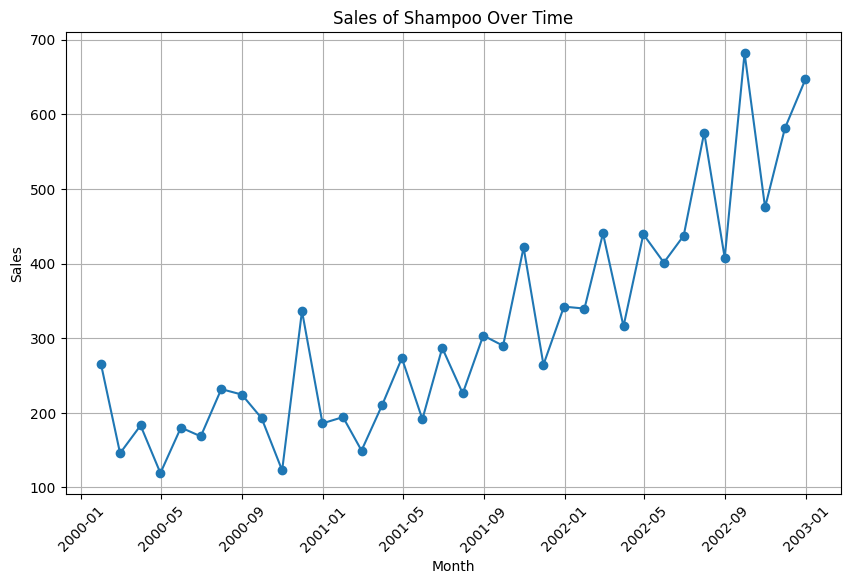

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Sales of shampoo over a three year period'], marker='o', linestyle='-')
plt.title('Sales of Shampoo Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

#5. Decompsition

<function matplotlib.pyplot.show(close=None, block=None)>

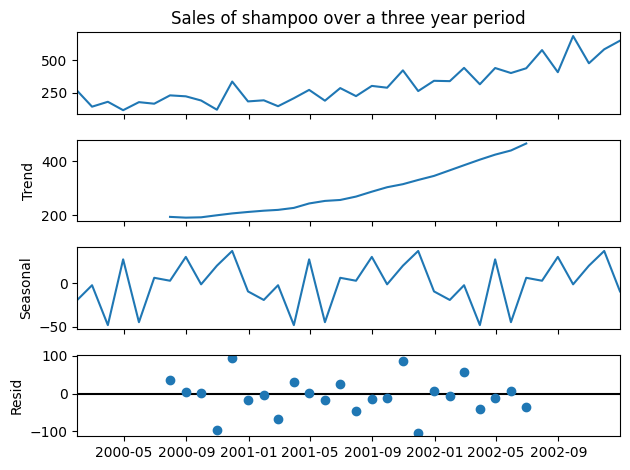

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['Sales of shampoo over a three year period'], model='additive')
fig=decomposition.plot()
plt.show

#6. Forecasting with ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales of shampoo over a three year period'])
print('ADF Statistics', adf_test[0])
print('p-value: ', adf_test[1])

ADF Statistics 3.060142083641181
p-value:  1.0


#7. Fit an ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Sales of shampoo over a three year period'], order=(1,1,1))
results = model.fit()
print(results.summary())

                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                                       Wed, 13 Mar 2024   AIC                            406.782
Time:                                               01:04:07   BIC                            411.448
Sample:                                           01-31-2000   HQIC                           408.393
                                                - 12-31-2002                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003     

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


#8. Forecasting Future Values

<function matplotlib.pyplot.show(close=None, block=None)>

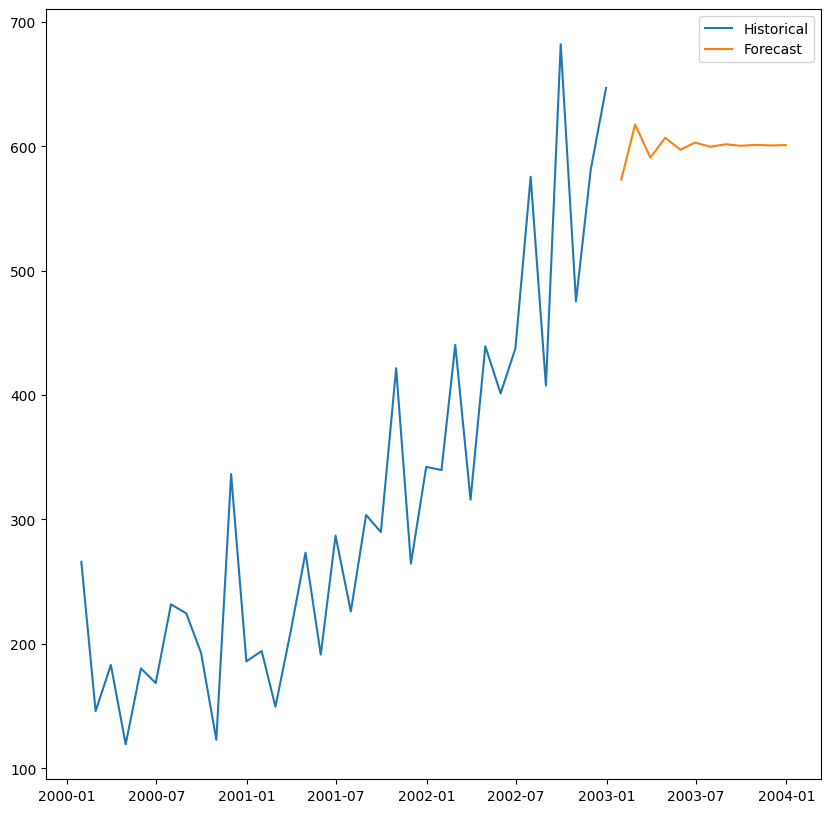

In [ ]:
forecast = results.forecast(steps=12)
plt.figure(figsize=(10,10))
plt.plot(data.index, data['Sales of shampoo over a three year period'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show